## 1. Data Collection & Loading

Dataset shape: (4601, 58)

Missing values:
 feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
feature_31    0
feature_32    0
feature_33    0
feature_34    0
feature_35    0
feature_36    0
feature_37    0
feature_38    0
feature_39    0
feature_40    0
feature_41    0
feature_42    0
feature_43    0
feature_44    0
feature_45    0
feature_46    0
feature_47    0
feature_48    0
feature_49    0
feature_50    0
feature_51    0
feature_52    0
feature_53    0
feature_54    0
feature_55    0
feature_56    0
label         0
dtype: int64

Class distribu

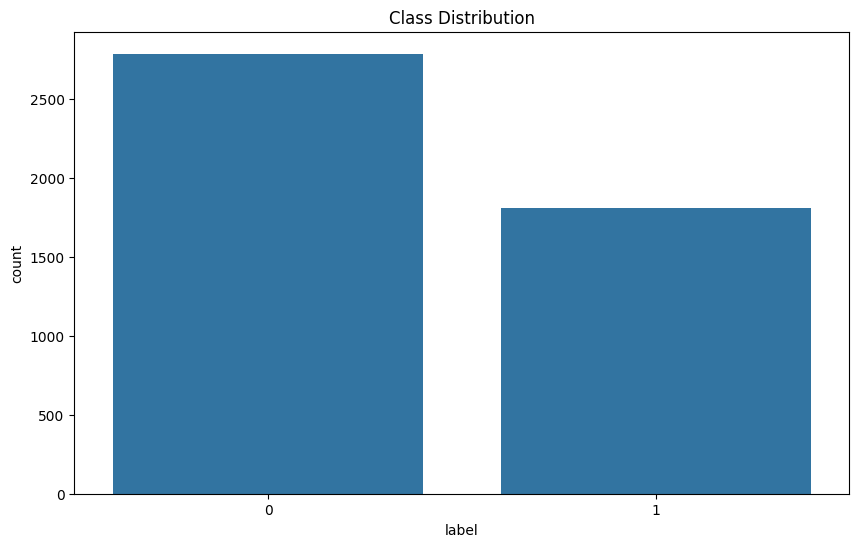

In [2]:
import pandas as pd


# Load dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"

# Assign column names
column_names = [f'feature_{i}' for i in range(57)] + ['label']
df = pd.read_csv(url, header=None, names=column_names)
df.head()

# After data loading
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nClass distribution:\n", df['label'].value_counts(normalize=True))

# Basic EDA
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label')
plt.title('Class Distribution')
plt.show()

## 2. Preprocessing

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('label', axis=1)
y = df['label']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



## 3. Model Development

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

# Train each model
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

Logistic Regression trained.
Naive Bayes trained.
SVM trained.
Random Forest trained.


## 4. Evaluation

In [6]:
from sklearn.metrics import (
accuracy_score, precision_score, recall_score, f1_score,
classification_report, confusion_matrix)
from tabulate import tabulate


# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

performance_summary = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    performance_summary.append([name, accuracy, precision, recall, f1])

print("\nModel Performance Summary:")
print(tabulate(performance_summary, 
               headers=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'],
               tablefmt='grid',
               floatfmt='.3f'))


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921

Confusion Matrix:
 [[506  25]
 [ 49 341]]

Naive Bayes Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       531
           1       0.72      0.94      0.82       390

    accuracy                           0.82       921
   macro avg       0.83      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921

Confusion Matrix:
 [[391 140]
 [ 24 366]]

SVM Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       531
           1       0.95      0.89      0.92       390

    accuracy           

## 5. Hyperparameter Tuning

Fitting 5 folds for each of 36 candidates, totalling 180 fits


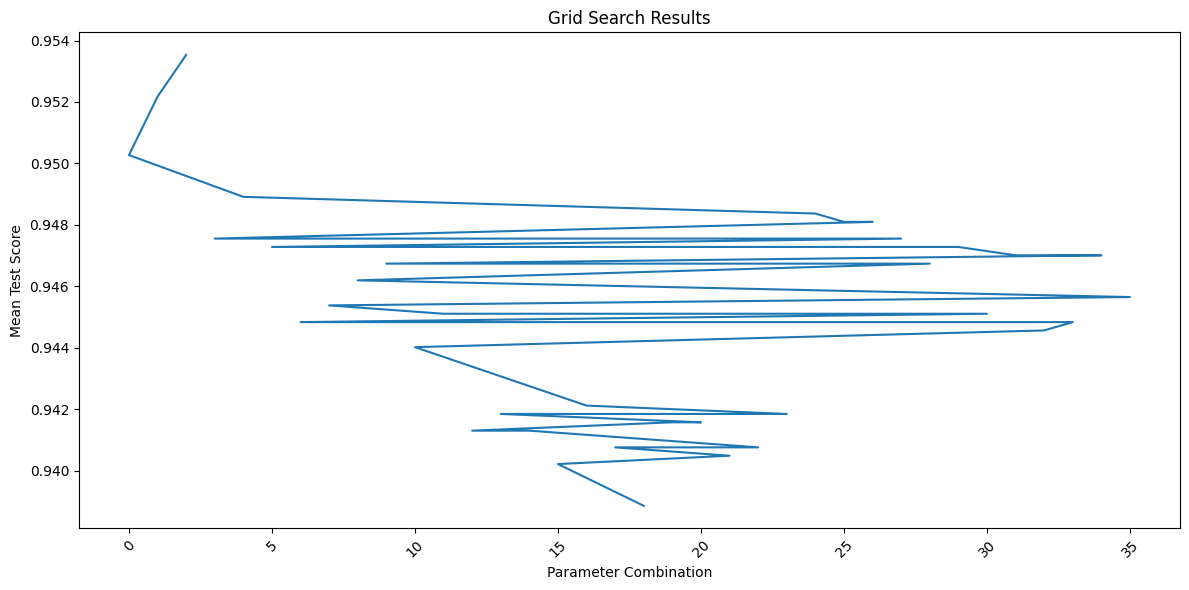


Top 5 Parameter Combinations:
                                               params  mean_test_score  \
2   {'max_depth': None, 'min_samples_leaf': 1, 'mi...         0.953533   
1   {'max_depth': None, 'min_samples_leaf': 1, 'mi...         0.952174   
0   {'max_depth': None, 'min_samples_leaf': 1, 'mi...         0.950272   
4   {'max_depth': None, 'min_samples_leaf': 1, 'mi...         0.948913   
24  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.948370   

    std_test_score  
2         0.010503  
1         0.009699  
0         0.010297  
4         0.007422  
24        0.007190  
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best estimator: RandomForestClassifier(n_estimators=150, random_state=42)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt


# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Setup GridSearchCV
grid = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
# Visualize grid search results

# Convert grid search results to DataFrame
cv_results = pd.DataFrame(grid.cv_results_)
cv_results = cv_results.sort_values('rank_test_score')

# Plot mean test scores for different parameter combinations
plt.figure(figsize=(12, 6))
plt.plot(cv_results['mean_test_score'])
plt.title('Grid Search Results')
plt.xlabel('Parameter Combination')
plt.ylabel('Mean Test Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print top 5 parameter combinations
print("\nTop 5 Parameter Combinations:")
print(cv_results[['params', 'mean_test_score', 'std_test_score']].head())

# Output best parameters and estimator
print("Best parameters:", grid.best_params_)
print("Best estimator:", grid.best_estimator_)




## 6. Deployment

In [ ]:
import joblib
import pandas as pd

def classify_email(input_features):
    # Load trained model and scaler
    model = joblib.load("spam_classifier_model.pkl")
    scaler = joblib.load("spam_scaler.pkl")

    # Convert input to DataFrame and scale
    input_df = pd.DataFrame([input_features])
    input_scaled = scaler.transform(input_df)

    # Predict and return label
    prediction = model.predict(input_scaled)[0]
    return "SPAM" if prediction == 1 else "NOT SPAM"
